<a href="https://colab.research.google.com/github/sarobar412/machine_learning-and-deep-learning/blob/main/Copy_of_Copy_of_predicting_best_permutation_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold
import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim101 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim101 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim102 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim102 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim103 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim103 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim110 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim110 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim111 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim111 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim112 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim112 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim113 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim113 Trades.txt
Saving GC AT IPS(2)+TM(A) 2016-05_2021 sim120 Trades.txt to GC AT IPS(2)+TM(A) 2016-05_2021 sim120 Trades.txt
Saving GC 

In [ ]:
list1=['GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim101 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim102 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim103 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim110 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim111 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim112 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim113 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim120 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim121 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim122 Trades.txt',
'GC AT IPS(2)+TM(A) 2016-05_2021 sim123 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim130 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim131 Trades.txt',
'GC AT IPS(2)+TM(A) 2016-05_2021 sim132 Trades.txt',
 'GC AT IPS(2)+TM(A) 2016-05_2021 sim133 Trades.txt']

***combinig files into 1 pandas DF*** **

In [ ]:
df=pd.read_csv('GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt',delimiter='\t')
df['Symbol']='GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt'
for file in list1:
    df1=pd.read_csv(file,delimiter='\t')
    df1['Symbol']=file
    df=pd.concat([df,df1])  

In [ ]:
df.head()

,Symbol,Trade Type,Entry DateTime,Exit DateTime,Entry Price,Exit Price,Trade Quantity,Max Open Quantity,Max Closed Quantity,Profit/Loss (C),...,FlatToFlat Profit/Loss (C),FlatToFlat Max Open Profit (C),FlatToFlat Max Open Loss (C),Max Open Profit (C),Max Open Loss (C),Note,Total Efficiency,Commission (C),Open Position Quantity,Close Position Quantity
0,GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt,Short,2016-01-03 18:15:17.003 BP,2016-01-03 18:39:34.001,1063.1,1061.1,1.0,2.0,1.0,195.80,...,195.80,210.00,-20.00,210.00,-20.00,IPS2+TM(all),85.1%,4.2,2.0,1.0
1,GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt,Short,2016-01-03 18:15:17.003,2016-01-03 18:42:50.001 EP,1063.1,1062.0,1.0,2.0,2.0,105.80,...,301.60 F,420.00,-40.01,210.00,-20.00,IPS2+TM(all),23.0%,4.2,2.0,0.0
2,GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt,Long,2016-01-03 19:26:33.003 BP,2016-01-03 20:19:43.001 EP,1063.6,1061.6,2.0,2.0,2.0,-408.40,...,-408.40 F,220.01,-400.01,220.01,-400.01,IPS2+TM(all),-65.9%,8.4,2.0,0.0
3,GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt,Short,2016-01-03 20:19:43.009 BP,2016-01-03 21:27:22.012 EP,1061.6,1063.6,2.0,2.0,2.0,-408.40,...,-408.40 F,20.00,-400.00,20.00,-400.00,IPS2+TM(all),-97.2%,8.4,2.0,0.0
4,GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt,Long,2016-01-03 21:28:48.004 BP,2016-01-04 00:20:14.059,1063.7,1065.7,1.0,2.0,1.0,195.80,...,195.80,210.00,-110.00,210.00,-110.00,IPS2+TM(all),61.2%,4.2,2.0,1.0


In [ ]:
df=df.dropna()       #droping nan rows
df['P&L']=0          #creating a new for changing P%L into floats for calculation
for i in range(len(df)):
    df['P&L'].iloc[i]=float(df['Profit/Loss (C)'].iloc[i])     #changing P%L into floats
df['%P&L']=(df['P&L']/df['Entry Price'])*100          #calculating percentage P&L per stock
df['%P&L']=df['%P&L']/df['Trade Quantity']
df['%P&L']=df['%P&L']/100         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
#dropping columns with unused feature
df=df.drop(['Exit DateTime','Max Open Quantity',                              
       'Max Closed Quantity','Cumulative Profit/Loss (C)',
       'Duration', 'High Price While Open', 'Low Price While Open',
       'Exit Efficiency', 'Entry Efficiency', 'FlatToFlat Profit/Loss (C)',
       'FlatToFlat Max Open Profit (C)', 'FlatToFlat Max Open Loss (C)',
       'Max Open Profit (C)', 'Max Open Loss (C)', 'Note','Commission (C)', 'Open Position Quantity', 'Close Position Quantity'],axis=1)

In [ ]:
#chaninging names into simpler format
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim110 Trades.txt','Symbol']='sim110'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.txt','Symbol']='sim100'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim120 Trades.txt','Symbol']='sim120'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim130 Trades.txt','Symbol']='sim130'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim101 Trades.txt','Symbol']='sim101'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim132 Trades.txt','Symbol']='sim132'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim131 Trades.txt','Symbol']='sim131'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim121 Trades.txt','Symbol']='sim121'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim112 Trades.txt','Symbol']='sim112'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim111 Trades.txt','Symbol']='sim111'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim122 Trades.txt','Symbol']='sim122'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim123 Trades.txt','Symbol']='sim123'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim133 Trades.txt','Symbol']='sim133'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim113 Trades.txt','Symbol']='sim113'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim103 Trades.txt','Symbol']='sim103'
df.loc[df['Symbol']=='GC AT IPS(2)+TM(A) 2016-05_2021 sim102 Trades.txt','Symbol']='sim102'

In [ ]:
df.head()

,Symbol,Trade Type,Entry DateTime,Entry Price,Exit Price,Trade Quantity,Profit/Loss (C),Total Efficiency,P&L,%P&L
0,sim100,Short,2016-01-03 18:15:17.003 BP,1063.1,1061.1,1.0,195.80,85.1%,195.8,0.184178
1,sim100,Short,2016-01-03 18:15:17.003,1063.1,1062.0,1.0,105.80,23.0%,105.8,0.099520
2,sim100,Long,2016-01-03 19:26:33.003 BP,1063.6,1061.6,2.0,-408.40,-65.9%,-408.4,-0.191989
3,sim100,Short,2016-01-03 20:19:43.009 BP,1061.6,1063.6,2.0,-408.40,-97.2%,-408.4,-0.192351
4,sim100,Long,2016-01-03 21:28:48.004 BP,1063.7,1065.7,1.0,195.80,61.2%,195.8,0.184074


In [ ]:
df['Date']=pd.to_datetime(df['Entry DateTime'])          #making a column for date time in a pandas format
df['Hour']=df['Date'].dt.hour                            #making a column of hours
df=df.drop(['Entry DateTime'],axis=1)
df['Day']=df['Date'].dt.day_name()                       #weekdays from date
df['time']=df['Date'].dt.time                            #seperating time and date
df=df.sort_values(by='Date')                             #sorting values by date
int_time=pd.to_datetime(df['Date']).astype(int)/ 10**9   #making datetime into intiger format
df['int_time']=np.array(int_time)                        #adding intiger format into ouy dataframe
df=pd.concat([df,pd.get_dummies(df['Symbol'])],axis=1)   #one hot encoding symbol day and trade Type
df=pd.concat([df,pd.get_dummies(df['Day'])],axis=1)
df=pd.concat([df,pd.get_dummies(df['Trade Type'])],axis=1)
df=df.drop(['Symbol','Trade Type','Exit Price','Trade Quantity','Profit/Loss (C)','Total Efficiency','P&L'],axis=1)
df[' %P&L']=df['%P&L']                                    #moving the '%P&L column at the end for easier seperation
df=df.drop(['%P&L','Day'],axis=1)
df=df.drop(['time'],axis=1)
df['int_time']=df['int_time']/1000000

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname BP identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  import sys


In [ ]:
df.head()

,Entry Price,Date,Hour,int_time,sim100,sim101,sim102,sim103,sim110,sim111,...,sim133,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,Long,Short,%P&L
0,1063.6,2016-01-03 18:01:26.003,18,1451.844086,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,-0.191989
1,1063.6,2016-01-03 18:01:26.003,18,1451.844086,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.146484
0,1063.6,2016-01-03 18:01:26.003,18,1451.844086,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.184092
0,1063.6,2016-01-03 18:01:26.003,18,1451.844086,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.184092
0,1063.6,2016-01-03 18:01:26.003,18,1451.844086,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.090071


In [ ]:
df.shape

(220740, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220740 entries, 0 to 13000
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Entry Price  220740 non-null  float64       
 1   Date         220740 non-null  datetime64[ns]
 2   Hour         220740 non-null  int64         
 3   int_time     220740 non-null  float64       
 4   sim100       220740 non-null  uint8         
 5   sim101       220740 non-null  uint8         
 6   sim102       220740 non-null  uint8         
 7   sim103       220740 non-null  uint8         
 8   sim110       220740 non-null  uint8         
 9   sim111       220740 non-null  uint8         
 10  sim112       220740 non-null  uint8         
 11  sim113       220740 non-null  uint8         
 12  sim120       220740 non-null  uint8         
 13  sim121       220740 non-null  uint8         
 14  sim122       220740 non-null  uint8         
 15  sim123       220740 non-null  uint8

**in the cell below we are making a 3d numpy array in which all the features of current and previous 20 trade are stacked .

**Array Format--[sample,timesteps,feature]**  **

In [ ]:
XX=np.ones([1,20,28])
YY=np.ones([1])
for i in range(20,len(df),500):
    X=np.ones([1,20,28])
    Y=np.ones([1])
    for j in range(i,i+500):
        X0=df.iloc[j-20:j,:-1]
        X0=np.expand_dims(X0,axis=0)
        X=np.vstack([X,X0])
        Y0=df.iloc[j,-1]
        Y=np.vstack([Y,Y0])
    X=X[1:,:,:]
    Y=Y[1:]
    XX=np.vstack([XX,X])
    
    YY=np.vstack([YY,Y])
    
    print(i)

20
520
1020
1520
2020
2520
3020
3520
4020
4520
5020
5520
6020
6520
7020
7520
8020
8520
9020
9520
10020
10520
11020
11520
12020
12520
13020
13520
14020
14520
15020
15520
16020
16520
17020
17520
18020
18520
19020
19520
20020
20520
21020
21520
22020
22520
23020
23520
24020
24520
25020
25520
26020
26520
27020
27520
28020
28520
29020
29520
30020
30520
31020
31520
32020
32520
33020
33520
34020
34520
35020
35520
36020
36520
37020
37520
38020
38520
39020
39520
40020
40520
41020
41520
42020
42520
43020
43520
44020
44520
45020
45520
46020
46520
47020
47520
48020
48520
49020
49520
50020
50520
51020
51520
52020
52520
53020
53520
54020
54520
55020
55520
56020
56520
57020
57520
58020
58520
59020
59520
60020
60520
61020
61520
62020
62520
63020
63520
64020
64520
65020
65520
66020
66520
67020
67520
68020
68520
69020
69520
70020
70520
71020
71520
72020
72520
73020
73520
74020
74520
75020
75520
76020
76520
77020
77520
78020
78520
79020
79520
80020
80520
81020
81520
82020
82520
83020
83520
84020
84520
850

IndexError: ignored

In [ ]:
X_final=XX
Y_final=YY

**Making a keras deep neural network model**

In [ ]:
a=0                                #a and b are start and end of index of sample to be trained 
b=10000
X_train=X_final[a:b,:,2:]
Y_train=Y_final[a:b]
model=tf.keras.Sequential()
tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1])
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))) #adding a biderectional LSTM layer
model.add(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True))              #increasing LSTM layer and also the number of nodes in LSTM and dense layer
model.add(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(50,activation='relu',))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(70,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [ ]:
model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics='MAE')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Cross** **Validation**

In [ ]:

x=X_train
y=Y_train
kf=KFold(5,shuffle=True,random_state=42)
fold=0
for train,test in kf.split(x):
    fold+=1
    X_train=x[train]
    Y_train=y[train]
    X_test=x[test]
    Y_test=y[test]
    history=model.fit(tf.constant(X_train,dtype=tf.float16),tf.constant(Y_train,dtype=tf.float16),epochs=2,verbose=0)
    score=model.evaluate(tf.constant(X_test,dtype=tf.float16),tf.constant(Y_test,dtype=tf.float16))
    print(f"Final oos Score(RMSE):{score}")
x=X_train
y=Y_train
kf=KFold(5,shuffle=True,random_state=42)
fold=0
for train,test in kf.split(x):
    fold+=1
    X_train=x[train]
    Y_train=y[train]
    X_test=x[test]
    Y_test=y[test]
    history=model.fit(tf.constant(X_train,dtype=tf.float16),tf.constant(Y_train,dtype=tf.float16),epochs=2,verbose=0)
    model.evaluate(tf.constant(X_test,dtype=tf.float16),tf.constant(Y_test,dtype=tf.float16))
    print(f"Final oos Score('MAE'):{score}")

63/63 [==============================] - 7s 33ms/step - loss: 0.1397 - MAE: 0.1397
Final oos Score(RMSE):[0.13968966901302338, 0.13968966901302338]
63/63 [==============================] - 1s 18ms/step - loss: 0.1417 - MAE: 0.1417
Final oos Score(RMSE):[0.141678124666214, 0.141678124666214]
63/63 [==============================] - 1s 18ms/step - loss: 0.1446 - MAE: 0.1446
Final oos Score(RMSE):[0.14462736248970032, 0.14462736248970032]
63/63 [==============================] - 1s 18ms/step - loss: 0.1415 - MAE: 0.1415
Final oos Score(RMSE):[0.14151166379451752, 0.14151166379451752]
63/63 [==============================] - 1s 18ms/step - loss: 0.1420 - MAE: 0.1420
Final oos Score(RMSE):[0.14197218418121338, 0.14197218418121338]
50/50 [==============================] - 2s 17ms/step - loss: 0.1408 - MAE: 0.1408
Final oos Score('MAE'):[0.14197218418121338, 0.14197218418121338]
50/50 [==============================] - 1s 17ms/step - loss: 0.1376 - MAE: 0.1376
Final oos Score('MAE'):[0.141972

RMSE and MAE is improved

In [ ]:
c=15000        #index of chart to be prepaired
d=15030
Y_pred=(model.predict(tf.constant(X_final[c:d,:,2:],dtype=tf.float16)))
Y_true=Y_final[c:d]
Date=np.expand_dims(X_final[c:d,-1,1],axis=1)
simulation_list=['sim100','sim101','sim102','sim103','sim110','sim111','sim112','sim113','sim120','sim121','sim122','sim123','sim130','sim131','sim132','sim133']
index_list=np.argmax(X_final[c:d,-1,4:19],axis=1)
simulation=np.array([simulation_list[i] for i in index_list])
simulation=np.expand_dims(simulation,axis=1)
chart=pd.DataFrame(np.hstack([Date,simulation,Y_pred,Y_true]))
chart.columns=['DateTime','simulation','Y_pred','Y_true']

In [ ]:
chart

,DateTime,simulation,Y_pred,Y_true
0,2016-05-19 08:24:47.055,sim123,0.076377,-0.035397
1,2016-05-19 08:24:47.055,sim120,0.076377,-0.035397
2,2016-05-19 08:24:47.055,sim122,0.076377,-0.035397
3,2016-05-19 08:24:47.055,sim121,0.076377,0.156916
4,2016-05-19 08:29:45.302,sim121,0.076377,0.140888
5,2016-05-19 08:29:45.302,sim121,0.076377,0.076775
6,2016-05-19 08:29:45.302,sim123,0.076377,0.156916
7,2016-05-19 08:29:45.302,sim122,0.076377,0.036705
8,2016-05-19 08:29:45.302,sim122,0.076377,0.02869
9,2016-05-19 08:29:45.302,sim123,0.076377,0.196987


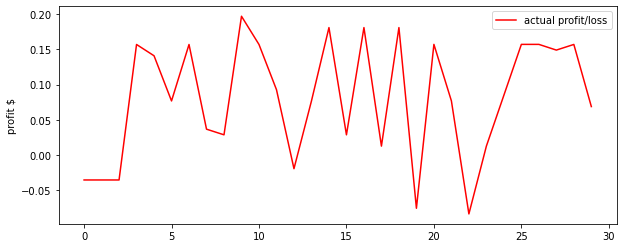

In [ ]:
plt.figure(figsize = [10, 4])
plt.plot(chart['Y_true'],label='actual profit/loss',c='r')
plt.ylabel('profit $')
plt.legend();

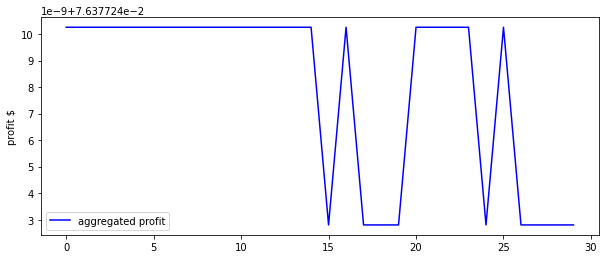

In [ ]:
plt.figure(figsize = [10, 4])

plt.ylabel('profit $')
plt.plot(chart['Y_pred'], label='aggregated profit', c='b')
plt.legend();